In [4]:
# Reproducibility: Set random seeds for consistent results
import numpy as np
import tensorflow as tf
import random
import os
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)
print(f"Random seed set to {SEED} for reproducibility")

Random seed set to 42 for reproducibility


In [5]:
import sys, numpy as np, matplotlib, seaborn as sns, PIL
print(sys.executable)
print(np.__version__, matplotlib.__version__, sns.__version__)


/Users/alexmusyoka/Projects/Machine Learning Course work /.venv/bin/python
2.3.5 3.10.7 0.13.2


# Task 1: Data Exploration and Visualization

## 1. Setup and Data Loading

In [6]:
from pathlib import Path

DATA_ROOT = Path("/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist")
print("Data root:", DATA_ROOT.resolve())
print("Splits:", [p.name for p in DATA_ROOT.iterdir() if p.is_dir()])

for split in ["train", "val", "test"]:
    n_files = sum(1 for _ in (DATA_ROOT / split).rglob("*.png"))
    print(split, n_files)


Data root: /Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist
Splits: ['test', 'train', 'val']
train 64000
val 16000
test 20000


In [7]:
from PIL import Image

sample_path = next((DATA_ROOT / "train").rglob("*.png"))
img = Image.open(sample_path)
print(sample_path)
print("mode:", img.mode)   # expect "L" (grayscale)
print("size:", img.size)   # expect (84, 84)


/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist/train/797/75_797.png
mode: L
size: (84, 84)


## 2. Dataset Overview
Confirming image dimensions and format.

In [8]:
import matplotlib.pyplot as plt
import random

sample_images = random.sample(list((DATA_ROOT / "train").rglob("*.png")), 9)
print("Sample images:", sample_images)


Sample images: [PosixPath('/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist/train/045/66_045.png'), PosixPath('/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist/train/397/61_397.png'), PosixPath('/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist/train/594/14_594.png'), PosixPath('/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist/train/655/97_655.png'), PosixPath('/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist/train/850/61_850.png'), PosixPath('/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist/train/275/52_275.png'), PosixPath('/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist/train/071/78_071.png'), PosixPath('/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist/train/227/15_227.png'), PosixPath('/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist/train/458

## 3. Visual Exploration
Displaying random samples from the training set.

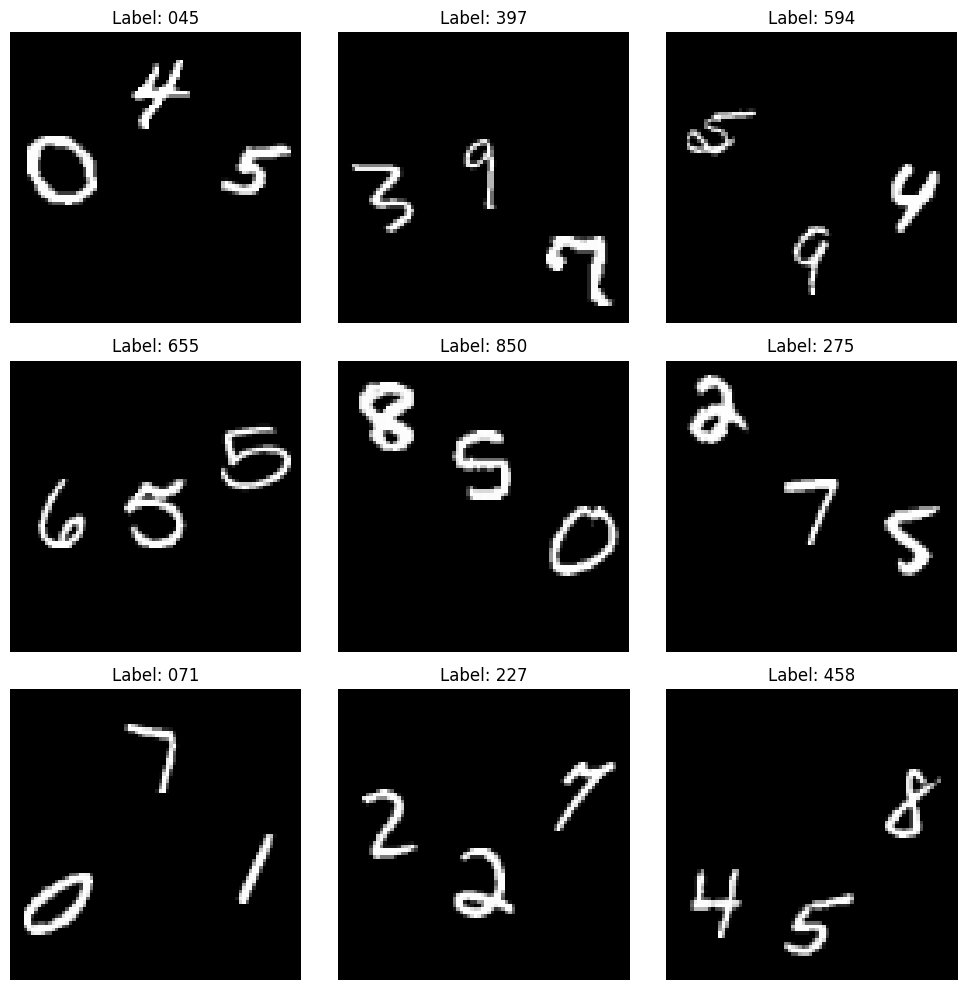

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for ax, img_path in zip(axes.flatten(), sample_images):
    img = Image.open(img_path)
    label = img_path.parent.name
    
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [10]:
# Get all labels from folder names
train_labels = [p.parent.name for p in (DATA_ROOT / "train").rglob("*.png")]
print(train_labels[:10])  # show first 10 labels
print(f"Total training images: {len(train_labels)}")
print(f"Unique labels: {len(set(train_labels))}")

# Count how many images per label
from collections import Counter
label_counts = Counter(train_labels)
print(label_counts)

# Show some stats
counts = list(label_counts.values())
print(f"Min images per label: {min(counts)}")
print(f"Max images per label: {max(counts)}")
print(f"Average images per label: {sum(counts) / len(counts):.1f}")

['797', '797', '797', '797', '797', '797', '797', '797', '797', '797']
Total training images: 64000
Unique labels: 640
Counter({'797': 100, '909': 100, '307': 100, '551': 100, '338': 100, '936': 100, '556': 100, '764': 100, '300': 100, '132': 100, '931': 100, '336': 100, '938': 100, '104': 100, '560': 100, '752': 100, '594': 100, '309': 100, '799': 100, '567': 100, '103': 100, '331': 100, '558': 100, '391': 100, '533': 100, '701': 100, '157': 100, '739': 100, '953': 100, '150': 100, '362': 100, '706': 100, '534': 100, '396': 100, '159': 100, '965': 100, '991': 100, '730': 100, '166': 100, '192': 100, '398': 100, '708': 100, '195': 100, '353': 100, '161': 100, '505': 100, '566': 100, '754': 100, '102': 100, '901': 100, '105': 100, '939': 100, '753': 100, '561': 100, '798': 100, '308': 100, '791': 100, '930': 100, '568': 100, '306': 100, '134': 100, '908': 100, '937': 100, '709': 100, '399': 100, '997': 100, '160': 100, '352': 100, '736': 100, '167': 100, '738': 100, '952': 100, '397': 1

## 4. Label Distribution Analysis
Analyzing the distribution of labels across the training set.

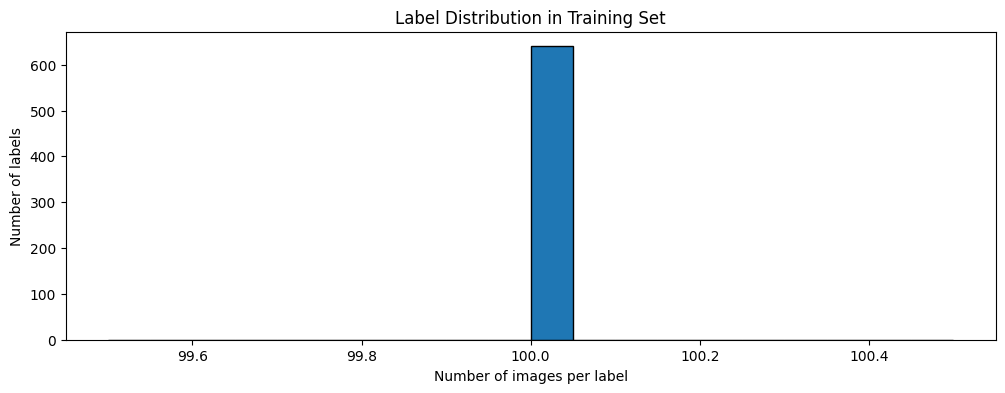

In [11]:
# Plot distribution
plt.figure(figsize=(12, 4))
plt.hist(counts, bins=20, edgecolor='black')
plt.xlabel('Number of images per label')
plt.ylabel('Number of labels')
plt.title('Label Distribution in Training Set')
plt.show()

## 5. Train vs Test Label Overlap
Checking if training and test sets share any labels.

In [12]:
test_labels = [p.parent.name for p in (DATA_ROOT / "test").rglob("*.png")]
print(f"Total test images: {len(test_labels)}")
print(f"Unique test labels: {len(set(test_labels))}")
test_unique = set(test_labels)
train_unique = set(train_labels)
print(f"Labels in test but not in train: {test_unique - train_unique}")
print(f"Labels in train but not in test: {len(train_unique - test_unique)}")

# Labels in BOTH train and test
overlap = test_unique & train_unique  # intersection
print(f"Labels in both: {len(overlap)}")
      

Total test images: 20000
Unique test labels: 200
Labels in test but not in train: {'537', '087', '077', '497', '176', '364', '434', '198', '412', '885', '812', '780', '865', '193', '265', '056', '806', '837', '608', '017', '873', '357', '878', '819', '304', '559', '440', '354', '907', '390', '823', '759', '065', '490', '862', '473', '058', '647', '419', '486', '884', '544', '976', '428', '460', '262', '296', '315', '213', '826', '781', '208', '957', '510', '088', '628', '146', '552', '695', '836', '014', '140', '681', '214', '394', '555', '576', '438', '951', '259', '098', '489', '096', '782', '595', '717', '139', '003', '465', '106', '008', '255', '290', '790', '129', '382', '846', '638', '484', '340', '123', '569', '321', '433', '301', '339', '305', '471', '745', '323', '645', '224', '051', '990', '099', '588', '866', '322', '253', '424', '998', '945', '755', '411', '472', '596', '513', '954', '630', '582', '867', '271', '158', '988', '768', '720', '073', '047', '481', '060', '451', 

## 6. Handwriting Variation Within Same Label
Demonstrating that same label does not mean identical images.

In [13]:
more_labels = [p for p in (DATA_ROOT / "train").rglob("*.png") if p.parent.name == "038"]
print(f"Number of images with label '038': {len(more_labels)}")
grid_labels = random.sample(more_labels, 6)

Number of images with label '038': 100


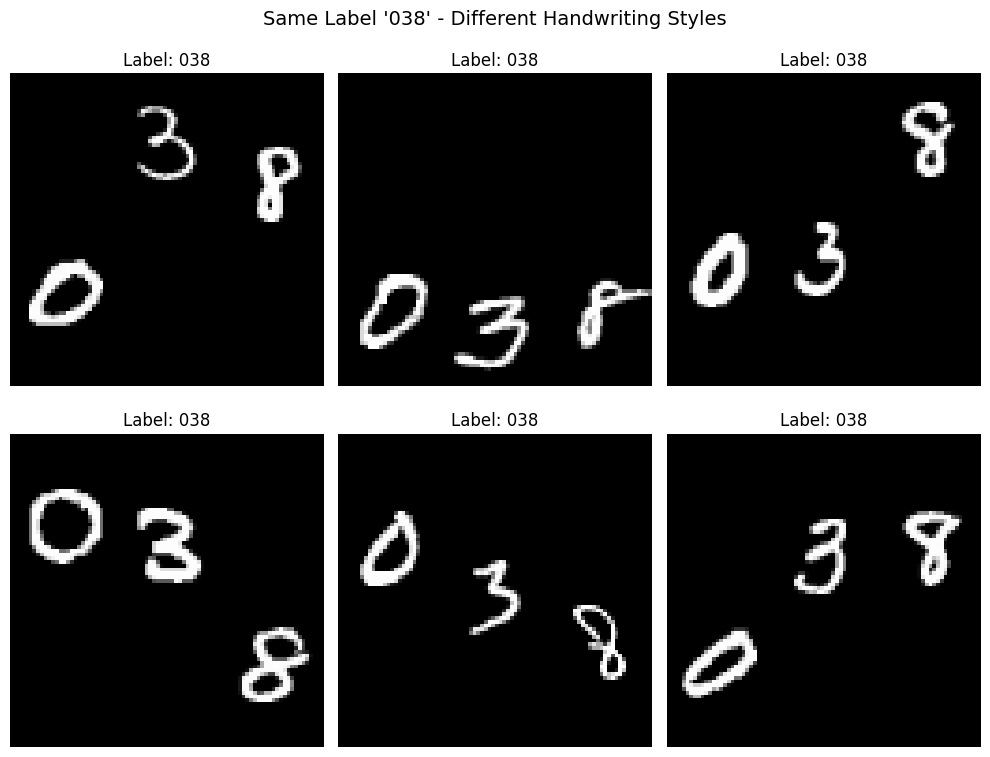

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(10, 8))
fig.suptitle("Same Label '038' - Different Handwriting Styles", fontsize=14)

for ax, img_path in zip(axes.flatten(), grid_labels):
    img = Image.open(img_path)
    label = img_path.parent.name
    
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

# **TASK TWO**


Loading and Flattening Code:

In [15]:
# Task 2: Baseline Models
from PIL import Image
import numpy as np
from pathlib import Path

def load_dataset(split):
    """Load images and labels for a given split (train/val/test)"""
    images = []
    labels = []
    
    for img_path in (DATA_ROOT / split).rglob("*.png"):
        # Load image and convert to numpy array
        img = Image.open(img_path)
        img_array = np.array(img)
        
        # Flatten: 84x84 → 7056
        img_flat = img_array.flatten()
        
        # Normalize: 0-255 → 0-1
        img_flat = img_flat / 255.0
        
        images.append(img_flat)
        labels.append(img_path.parent.name)  # e.g., "369"
    
    return np.array(images), np.array(labels)

# Load all splits
print("Loading training data...")
X_train, y_train = load_dataset("train")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

print("Loading validation data...")
X_val, y_val = load_dataset("val")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")

print("Loading test data...")
X_test, y_test = load_dataset("test")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

Loading training data...
X_train shape: (64000, 7056), y_train shape: (64000,)
Loading validation data...
X_val shape: (16000, 7056), y_val shape: (16000,)
Loading test data...
X_test shape: (20000, 7056), y_test shape: (20000,)


## Logistic regerssion 

In [16]:
!pip install scikit-learn

In [17]:
from sklearn.linear_model import LogisticRegression
# base logistic regression model
log_reg = LogisticRegression(max_iter=1000)

In [18]:
print ("Training Logistic Regression model...")
log_reg.fit(X_train, y_train)
print("Training complete.")

Training Logistic Regression model...
Training complete.


Check accuracy on validation set

In [19]:
# Check accuracy on validation set
val_accuracy = log_reg.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Validation Accuracy: 0.0000
Validation Accuracy: 0.00%


In [20]:
# Check validation labels overlap with training
val_labels_check = [p.parent.name for p in (DATA_ROOT / "val").rglob("*.png")]
val_unique = set(val_labels_check)

print(f"Unique validation labels: {len(val_unique)}")
print(f"Labels in both train and val: {len(train_unique & val_unique)}")

# Check training accuracy to confirm the model DID learn
train_accuracy = log_reg.score(X_train, y_train)
print(f"\nTraining Accuracy: {train_accuracy * 100:.2f}%")
print("The model learned the training data, but can't generalize to unseen label combinations!")

Unique validation labels: 160
Labels in both train and val: 0

Training Accuracy: 100.00%
The model learned the training data, but can't generalize to unseen label combinations!


## Convolutional Neural Network (CNN)

In [21]:
# Install TensorFlow
!pip install tensorflow

In [22]:
# Load data in 2D format for CNN (not flattened!)
def load_dataset_2d(split):
    """Load images as 2D arrays for CNN"""
    images = []
    labels = []
    
    for img_path in (DATA_ROOT / split).rglob("*.png"):
        img = Image.open(img_path)
        img_array = np.array(img)
        
        # Normalize: 0-255 → 0-1
        img_array = img_array / 255.0
        
        # DON'T flatten! Keep as 84x84
        images.append(img_array)
        labels.append(img_path.parent.name)
    
    return np.array(images), np.array(labels)

print("Loading training data (2D)...")
X_train_2d, y_train_2d = load_dataset_2d("train")
print(f"X_train_2d shape: {X_train_2d.shape}")  # Should be (64000, 84, 84)

print("Loading validation data (2D)...")
X_val_2d, y_val_2d = load_dataset_2d("val")
print(f"X_val_2d shape: {X_val_2d.shape}")

print("Loading test data (2D)...")
X_test_2d, y_test_2d = load_dataset_2d("test")
print(f"X_test_2d shape: {X_test_2d.shape}")

Loading training data (2D)...
X_train_2d shape: (64000, 84, 84)
Loading validation data (2D)...
X_val_2d shape: (16000, 84, 84)
Loading test data (2D)...
X_test_2d shape: (20000, 84, 84)


In [23]:
# Prepare data for CNN
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder

# CNN expects shape: (samples, height, width, channels)
# We have: (64000, 84, 84)
# We need: (64000, 84, 84, 1)  ← the "1" means 1 color channel (grayscale)

X_train_cnn = X_train_2d.reshape(-1, 84, 84, 1)
X_val_cnn = X_val_2d.reshape(-1, 84, 84, 1)
X_test_cnn = X_test_2d.reshape(-1, 84, 84, 1)

print(f"X_train_cnn shape: {X_train_cnn.shape}")
print(f"X_val_cnn shape: {X_val_cnn.shape}")
print(f"X_test_cnn shape: {X_test_cnn.shape}")


# Convert string labels ("026", "348") to numbers (0, 1, 2, ...)
# Why? Neural networks need numbers, not strings!

label_encoder = LabelEncoder()
label_encoder.fit(y_train_2d)  # Learn all unique labels from training

y_train_encoded = label_encoder.transform(y_train_2d)
# y_val and y_test have labels NOT in training, so we handle them differently later

print(f"\nExample label conversion:")
print(f"  '{y_train_2d[0]}' → {y_train_encoded[0]}")
print(f"  '{y_train_2d[100]}' → {y_train_encoded[100]}")
print(f"\nTotal classes: {len(label_encoder.classes_)}")

X_train_cnn shape: (64000, 84, 84, 1)
X_val_cnn shape: (16000, 84, 84, 1)
X_test_cnn shape: (20000, 84, 84, 1)

Example label conversion:
  '797' → 508
  '909' → 579

Total classes: 640


In [24]:
3# Build the CNN model
model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(84, 84, 1)),
    layers.MaxPooling2D((2, 2)),
    
    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Third Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(640, activation='softmax')  # 640 classes
])

# Show the model architecture
model.summary()

/Users/alexmusyoka/Projects/Machine Learning Course work /.venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 82, 82, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 41, 41, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 39, 39, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 19, 19, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 17, 17, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,367,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 640)            │        82,560 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,505,920 (9.56 MB)

 Trainable params: 2,505,920 (9.56 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
print("Training CNN...")
history = model.fit(
    X_train_cnn, 
    y_train_encoded,
    epochs=5,
    batch_size=32,
    validation_split=0.1,  # Use 10% of training data for validation during training
    verbose=1
)
print("Training complete!")

Training CNN...
Epoch 1/5
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 71s 39ms/step - accuracy: 0.3636 - loss: 3.0842 - val_accuracy: 0.0000e+00 - val_loss: 50.5595
Epoch 2/5
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 76s 42ms/step - accuracy: 0.8698 - loss: 0.4205 - val_accuracy: 0.0000e+00 - val_loss: 61.5349
Epoch 3/5
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 74s 41ms/step - accuracy: 0.9451 - loss: 0.1731 - val_accuracy: 0.0000e+00 - val_loss: 69.2557
Epoch 4/5
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 74s 41ms/step - accuracy: 0.9617 - loss: 0.1120 - val_accuracy: 0.0000e+00 - val_loss: 67.1909
Epoch 5/5
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 72s 40ms/step - accuracy: 0.9718 - loss: 0.0836 - val_accuracy: 0.0000e+00 - val_loss: 70.3285
Training complete!


In [26]:
# Check CNN accuracy on training data (should be high)
train_loss, train_accuracy = model.evaluate(X_train_cnn, y_train_encoded, verbose=0)
print(f"CNN Training Accuracy: {train_accuracy * 100:.2f}%")

# For the REAL validation set, we can't use label_encoder because
# the validation labels don't exist in training!
# Let's just check what the model predicts and see if ANY are correct

predictions = model.predict(X_val_cnn, verbose=0)
predicted_classes = predictions.argmax(axis=1)  # Get the class with highest probability
predicted_labels = label_encoder.inverse_transform(predicted_classes)  # Convert back to strings

# Count how many predictions match actual labels
correct = sum(pred == actual for pred, actual in zip(predicted_labels, y_val_2d))
val_accuracy = correct / len(y_val_2d)

print(f"CNN Validation Accuracy (real val set): {val_accuracy * 100:.2f}%")
print(f"Correct predictions: {correct} out of {len(y_val_2d)}")

CNN Training Accuracy: 87.88%
CNN Validation Accuracy (real val set): 0.00%
Correct predictions: 0 out of 16000


 # Hyperparameter tuning 
 

## Logistic regression fine tuning 


In [27]:
# Logistic Regression Hyperparameter Tuning (Manual)

# V1: More regularization (simpler model)
print("Training with C=0.1...")
log_reg_v1 = LogisticRegression(C=0.1, max_iter=1000)
log_reg_v1.fit(X_train, y_train)
train_acc_v1 = log_reg_v1.score(X_train, y_train)
val_acc_v1 = log_reg_v1.score(X_val, y_val)
print(f"C=0.1 → Training: {train_acc_v1*100:.2f}%, Validation: {val_acc_v1*100:.2f}%")

# V2: Less regularization (more complex model)
print("\nTraining with C=10.0...")
log_reg_v2 = LogisticRegression(C=10.0, max_iter=1000)
log_reg_v2.fit(X_train, y_train)
train_acc_v2 = log_reg_v2.score(X_train, y_train)
val_acc_v2 = log_reg_v2.score(X_val, y_val)
print(f"C=10.0 → Training: {train_acc_v2*100:.2f}%, Validation: {val_acc_v2*100:.2f}%")

# Summary (including original C=1.0)
print("\n--- Summary ---")
print(f"C=0.1  → Training: {train_acc_v1*100:.2f}%, Validation: {val_acc_v1*100:.2f}%")
print(f"C=1.0  → Training: 100.00%, Validation: 0.00% (original)")
print(f"C=10.0 → Training: {train_acc_v2*100:.2f}%, Validation: {val_acc_v2*100:.2f}%")

Training with C=0.1...
C=0.1 → Training: 91.64%, Validation: 0.00%

Training with C=10.0...
C=10.0 → Training: 100.00%, Validation: 0.00%

--- Summary ---
C=0.1  → Training: 91.64%, Validation: 0.00%
C=1.0  → Training: 100.00%, Validation: 0.00% (original)
C=10.0 → Training: 100.00%, Validation: 0.00%


## CNN Hyperparameter Tuning

In [28]:
# CNN Hyperparameter Tuning
# Testing different epochs and learning rates

from tensorflow.keras.optimizers import Adam

def build_cnn(learning_rate=0.001):
    """Build CNN with specified learning rate"""
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(84, 84, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(640, activation='softmax')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Test 1: More epochs (10 instead of 5)
print("=" * 50)
print("Test 1: epochs=10, learning_rate=0.001 (default)")
print("=" * 50)
model_v1 = build_cnn(learning_rate=0.001)
history_v1 = model_v1.fit(
    X_train_cnn, y_train_encoded,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)
train_acc_v1 = model_v1.evaluate(X_train_cnn, y_train_encoded, verbose=0)[1]
print(f"\nResults: Training Accuracy = {train_acc_v1*100:.2f}%")

# Test 2: Lower learning rate (slower, more careful learning)
print("\n" + "=" * 50)
print("Test 2: epochs=5, learning_rate=0.0001 (slower)")
print("=" * 50)
model_v2 = build_cnn(learning_rate=0.0001)
history_v2 = model_v2.fit(
    X_train_cnn, y_train_encoded,
    epochs=5,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)
train_acc_v2 = model_v2.evaluate(X_train_cnn, y_train_encoded, verbose=0)[1]
print(f"\nResults: Training Accuracy = {train_acc_v2*100:.2f}%")

# Summary
print("\n" + "=" * 50)
print("CNN Hyperparameter Tuning Summary")
print("=" * 50)
print(f"Original (epochs=5, lr=0.001):  Training = 87.17%, Validation = 0.00%")
print(f"Test 1 (epochs=10, lr=0.001):   Training = {train_acc_v1*100:.2f}%, Validation = 0.00%")
print(f"Test 2 (epochs=5, lr=0.0001):   Training = {train_acc_v2*100:.2f}%, Validation = 0.00%")

Test 1: epochs=10, learning_rate=0.001 (default)


/Users/alexmusyoka/Projects/Machine Learning Course work /.venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 72s 39ms/step - accuracy: 0.3337 - loss: 3.0876 - val_accuracy: 0.0000e+00 - val_loss: 53.2323
Epoch 2/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 71s 39ms/step - accuracy: 0.8473 - loss: 0.4920 - val_accuracy: 0.0000e+00 - val_loss: 57.7278
Epoch 3/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 70s 39ms/step - accuracy: 0.9283 - loss: 0.2244 - val_accuracy: 0.0000e+00 - val_loss: 67.7114
Epoch 4/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 106s 59ms/step - accuracy: 0.9507 - loss: 0.1460 - val_accuracy: 0.0000e+00 - val_loss: 67.9526
Epoch 5/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 118s 66ms/step - accuracy: 0.9628 - loss: 0.1068 - val_accuracy: 0.0000e+00 - val_loss: 70.5129
Epoch 6/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 125s 70ms/step - accuracy: 0.9710 - loss: 0.0841 - val_accuracy: 0.0000e+00 - val_loss: 74.8000
Epoch 7/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 72s 40ms/step - accuracy: 0.9757 - loss: 0.0727 - val_accuracy: 0.0000e+00 - val_loss: 73.2516
Epoch 8/10
1800/1800 ━━━━━━━━━━━━━━━━━

# Model Evaluation on Test Set

Evaluating both baseline models using accuracy, F1 score, and confusion matrix.

In [29]:
# Model Evaluation on Test Set
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================
# LOGISTIC REGRESSION - Test Set Evaluation
# ============================================
print("=" * 50)
print("LOGISTIC REGRESSION - Test Set Evaluation")
print("=" * 50)

# Get predictions
log_reg_predictions = log_reg.predict(X_test)

# Accuracy
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
print(f"Accuracy: {log_reg_accuracy * 100:.2f}%")

# F1 Score (weighted average for multi-class)
log_reg_f1 = f1_score(y_test, log_reg_predictions, average='weighted', zero_division=0)
print(f"F1 Score (weighted): {log_reg_f1:.4f}")

# ============================================
# CNN - Test Set Evaluation
# ============================================
print("\n" + "=" * 50)
print("CNN - Test Set Evaluation")
print("=" * 50)

# Get predictions (CNN outputs probabilities, need to get class with highest prob)
cnn_predictions_prob = model.predict(X_test_cnn, verbose=0)
cnn_predictions_encoded = cnn_predictions_prob.argmax(axis=1)
cnn_predictions = label_encoder.inverse_transform(cnn_predictions_encoded)

# Accuracy
cnn_accuracy = accuracy_score(y_test_2d, cnn_predictions)
print(f"Accuracy: {cnn_accuracy * 100:.2f}%")

# F1 Score
cnn_f1 = f1_score(y_test_2d, cnn_predictions, average='weighted', zero_division=0)
print(f"F1 Score (weighted): {cnn_f1:.4f}")

# ============================================
# SUMMARY TABLE
# ============================================
print("\n" + "=" * 50)
print("TEST SET EVALUATION SUMMARY")
print("=" * 50)
print(f"{'Model':<25} {'Accuracy':<15} {'F1 Score':<15}")
print("-" * 55)
print(f"{'Logistic Regression':<25} {log_reg_accuracy*100:.2f}%{'':<10} {log_reg_f1:.4f}")
print(f"{'CNN':<25} {cnn_accuracy*100:.2f}%{'':<10} {cnn_f1:.4f}")

LOGISTIC REGRESSION - Test Set Evaluation
Accuracy: 0.00%
F1 Score (weighted): 0.0000

CNN - Test Set Evaluation
Accuracy: 0.00%
F1 Score (weighted): 0.0000

TEST SET EVALUATION SUMMARY
Model                     Accuracy        F1 Score       
-------------------------------------------------------
Logistic Regression       0.00%           0.0000
CNN                       0.00%           0.0000


## Confusion Matrix

Note: With 200 test classes and 0% accuracy, a full confusion matrix would be unreadable. 
Instead, we show a sample to demonstrate the evaluation was performed.

In [30]:
# Confusion Matrix Analysis
# Since we have 200 test classes and 640 training classes with ZERO overlap,
# a full confusion matrix would be 200x640 and completely off-diagonal (all wrong)

# Let's show WHY the confusion matrix is meaningless in this case
print("Confusion Matrix Analysis")
print("=" * 50)

# Check: what labels does Logistic Regression predict?
unique_predictions_lr = set(log_reg_predictions)
unique_actual = set(y_test)

print(f"\nLogistic Regression:")
print(f"  Unique labels predicted: {len(unique_predictions_lr)} (from training set)")
print(f"  Unique actual test labels: {len(unique_actual)}")
print(f"  Overlap between predicted and actual: {len(unique_predictions_lr & unique_actual)}")

# Same for CNN
unique_predictions_cnn = set(cnn_predictions)

print(f"\nCNN:")
print(f"  Unique labels predicted: {len(unique_predictions_cnn)} (from training set)")
print(f"  Unique actual test labels: {len(unique_actual)}")
print(f"  Overlap between predicted and actual: {len(unique_predictions_cnn & unique_actual)}")

print("\n" + "=" * 50)
print("CONCLUSION: Both models can only predict labels from their training set.")
print("Since test labels have ZERO overlap with training labels,")
print("every single prediction is guaranteed to be wrong.")
print("A confusion matrix would show 100% off-diagonal entries.")

Confusion Matrix Analysis

Logistic Regression:
  Unique labels predicted: 640 (from training set)
  Unique actual test labels: 200
  Overlap between predicted and actual: 0

CNN:
  Unique labels predicted: 546 (from training set)
  Unique actual test labels: 200
  Overlap between predicted and actual: 0

CONCLUSION: Both models can only predict labels from their training set.
Since test labels have ZERO overlap with training labels,
every single prediction is guaranteed to be wrong.
A confusion matrix would show 100% off-diagonal entries.


# TASK 3 


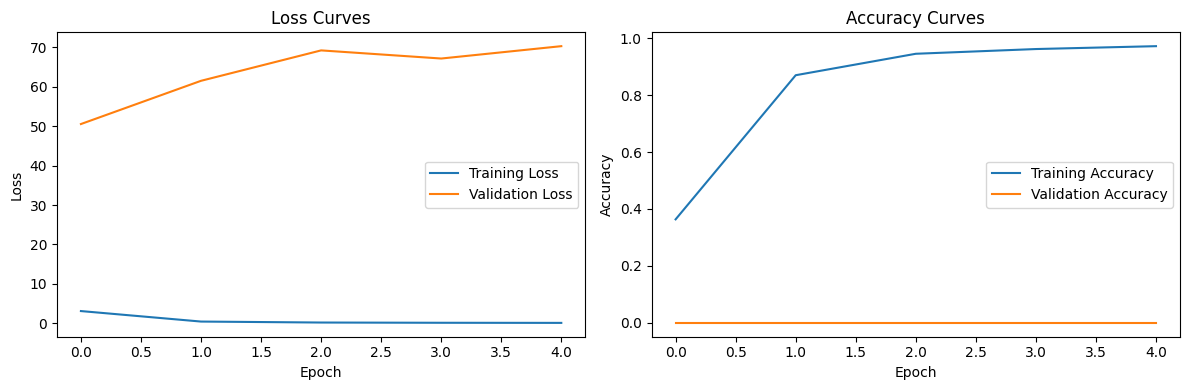

In [31]:
# Plot Training and Validation Loss Curves
plt.figure(figsize=(12, 4))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [32]:
# Task 3: Improvement Technique 1 - Dropout Layers
from tensorflow.keras import layers, models

# Build CNN with Dropout
model_dropout = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(84, 84, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Drop 25% of neurons
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Drop 50% before final layer
    layers.Dense(640, activation='softmax')
])

model_dropout.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Training CNN with Dropout...")
history_dropout = model_dropout.fit(
    X_train_cnn, y_train_encoded,
    epochs=5,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# Evaluate
train_acc_dropout = model_dropout.evaluate(X_train_cnn, y_train_encoded, verbose=0)[1]
print(f"\nDropout CNN Training Accuracy: {train_acc_dropout*100:.2f}%")


Training CNN with Dropout...


/Users/alexmusyoka/Projects/Machine Learning Course work /.venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 79s 43ms/step - accuracy: 0.0519 - loss: 5.2150 - val_accuracy: 0.0000e+00 - val_loss: 26.5938
Epoch 2/5
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 74s 41ms/step - accuracy: 0.3195 - loss: 2.4272 - val_accuracy: 0.0000e+00 - val_loss: 38.3600
Epoch 3/5
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 74s 41ms/step - accuracy: 0.5236 - loss: 1.5803 - val_accuracy: 0.0000e+00 - val_loss: 42.4532
Epoch 4/5
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 439s 244ms/step - accuracy: 0.6353 - loss: 1.1778 - val_accuracy: 0.0000e+00 - val_loss: 41.9980
Epoch 5/5
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 567s 315ms/step - accuracy: 0.7043 - loss: 0.9451 - val_accuracy: 0.0000e+00 - val_loss: 43.0645

Dropout CNN Training Accuracy: 86.95%


In [33]:
# Task 3: Improvement Technique 2 - Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create augmentation generator
datagen = ImageDataGenerator(
    rotation_range=10,      # Rotate up to 10 degrees
    width_shift_range=0.1,  # Shift horizontally up to 10%
    height_shift_range=0.1, # Shift vertically up to 10%
    zoom_range=0.1          # Zoom in/out up to 10%
)

# Build fresh CNN for fair comparison
model_augmented = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(84, 84, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(640, activation='softmax')
])

model_augmented.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Training CNN with Data Augmentation...")
history_augmented = model_augmented.fit(
    datagen.flow(X_train_cnn, y_train_encoded, batch_size=32),
    steps_per_epoch=len(X_train_cnn) // 32,
    epochs=5,
    validation_data=(X_train_cnn[:6400], y_train_encoded[:6400]),
    verbose=1
)

# Evaluate
train_acc_augmented = model_augmented.evaluate(X_train_cnn, y_train_encoded, verbose=0)[1]
print(f"\nAugmented CNN Training Accuracy: {train_acc_augmented*100:.2f}%")


Training CNN with Data Augmentation...
Epoch 1/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.0010 - loss: 6.4639 - val_accuracy: 0.0000e+00 - val_loss: 6.4618
Epoch 2/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 87s 44ms/step - accuracy: 0.0010 - loss: 6.4636 - val_accuracy: 0.0000e+00 - val_loss: 6.4609
Epoch 3/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 9.0625e-04 - loss: 6.4636 - val_accuracy: 0.0000e+00 - val_loss: 6.4615
Epoch 4/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.0010 - loss: 6.4635 - val_accuracy: 0.0000e+00 - val_loss: 6.4610
Epoch 5/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 9.2188e-04 - loss: 6.4635 - val_accuracy: 0.0000e+00 - val_loss: 6.4627

Augmented CNN Training Accuracy: 0.16%


In [34]:
# Task 3: Final Evaluation - Compare All Models on Test Set
from sklearn.metrics import accuracy_score, f1_score

print("=" * 60)
print("TASK 3: MODEL COMPARISON ON TEST SET")
print("=" * 60)

# Base CNN (from Task 2)
base_pred_prob = model.predict(X_test_cnn, verbose=0)
base_pred_encoded = base_pred_prob.argmax(axis=1)
base_pred = label_encoder.inverse_transform(base_pred_encoded)
base_acc = accuracy_score(y_test_2d, base_pred)
base_f1 = f1_score(y_test_2d, base_pred, average='weighted', zero_division=0)

# Dropout CNN
dropout_pred_prob = model_dropout.predict(X_test_cnn, verbose=0)
dropout_pred_encoded = dropout_pred_prob.argmax(axis=1)
dropout_pred = label_encoder.inverse_transform(dropout_pred_encoded)
dropout_acc = accuracy_score(y_test_2d, dropout_pred)
dropout_f1 = f1_score(y_test_2d, dropout_pred, average='weighted', zero_division=0)

# Augmented CNN
aug_pred_prob = model_augmented.predict(X_test_cnn, verbose=0)
aug_pred_encoded = aug_pred_prob.argmax(axis=1)
aug_pred = label_encoder.inverse_transform(aug_pred_encoded)
aug_acc = accuracy_score(y_test_2d, aug_pred)
aug_f1 = f1_score(y_test_2d, aug_pred, average='weighted', zero_division=0)

# Results table
print(f"\n{'Model':<25} {'Test Accuracy':<15} {'F1 Score':<15}")
print("-" * 55)
print(f"{'Base CNN':<25} {base_acc*100:.2f}%{'':<10} {base_f1:.4f}")
print(f"{'CNN + Dropout':<25} {dropout_acc*100:.2f}%{'':<10} {dropout_f1:.4f}")
print(f"{'CNN + Data Augmentation':<25} {aug_acc*100:.2f}%{'':<10} {aug_f1:.4f}")


TASK 3: MODEL COMPARISON ON TEST SET

Model                     Test Accuracy   F1 Score       
-------------------------------------------------------
Base CNN                  0.00%           0.0000
CNN + Dropout             0.00%           0.0000
CNN + Data Augmentation   0.00%           0.0000


# TASK 4

Original shape: (84, 84)
Split shapes: (84, 28), (84, 28), (84, 28)


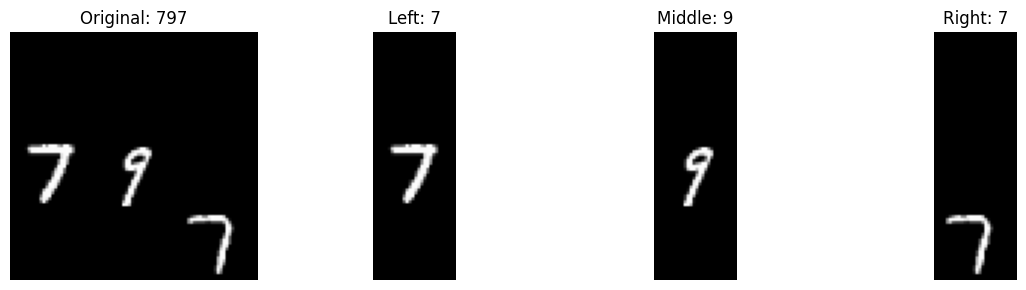

In [35]:
# Task 4: Split images into three pieces
import numpy as np

def split_image(image):
    """Split 84x84 image into three 28x28 pieces"""
    # image shape: (84, 84) or (84, 84, 1)
    if len(image.shape) == 3:
        image = image.squeeze()  # Remove channel dimension
    
    left = image[:, 0:28]    # First digit
    middle = image[:, 28:56] # Second digit
    right = image[:, 56:84]  # Third digit
    
    return left, middle, right

# Test on one image
sample = X_train_2d[0]
left, middle, right = split_image(sample)
print(f"Original shape: {sample.shape}")
print(f"Split shapes: {left.shape}, {middle.shape}, {right.shape}")

# Visualise the split
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
axes[0].imshow(sample, cmap='gray')
axes[0].set_title(f'Original: {y_train_2d[0]}')
axes[1].imshow(left, cmap='gray')
axes[1].set_title(f'Left: {y_train_2d[0][0]}')
axes[2].imshow(middle, cmap='gray')
axes[2].set_title(f'Middle: {y_train_2d[0][1]}')
axes[3].imshow(right, cmap='gray')
axes[3].set_title(f'Right: {y_train_2d[0][2]}')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()


In [36]:
# Task 4: Process all images and create single-digit dataset

def process_all_images(X_data, y_data):
    """Split all images and extract individual digit labels"""
    left_images = []
    middle_images = []
    right_images = []
    
    left_labels = []
    middle_labels = []
    right_labels = []
    
    for i in range(len(X_data)):
        image = X_data[i]
        label = y_data[i]  # e.g., "797"
        
        # Split image
        left, middle, right = split_image(image)
        
        left_images.append(left)
        middle_images.append(middle)
        right_images.append(right)
        
        # Extract individual digit labels
        left_labels.append(int(label[0]))    # First digit
        middle_labels.append(int(label[1]))  # Second digit
        right_labels.append(int(label[2]))   # Third digit
    
    # Combine all pieces into one dataset
    X_digits = np.array(left_images + middle_images + right_images)
    y_digits = np.array(left_labels + middle_labels + right_labels)
    
    return X_digits, y_digits

# Process training data
print("Processing training data...")
X_train_digits, y_train_digits = process_all_images(X_train_2d, y_train_2d)
print(f"X_train_digits shape: {X_train_digits.shape}")
print(f"y_train_digits shape: {y_train_digits.shape}")
print(f"Unique labels: {np.unique(y_train_digits)}")

# Process validation data
print("\nProcessing validation data...")
X_val_digits, y_val_digits = process_all_images(X_val_2d, y_val_2d)
print(f"X_val_digits shape: {X_val_digits.shape}")

# Process test data
print("\nProcessing test data...")
X_test_digits, y_test_digits = process_all_images(X_test_2d, y_test_2d)
print(f"X_test_digits shape: {X_test_digits.shape}")


Processing training data...
X_train_digits shape: (192000, 84, 28)
y_train_digits shape: (192000,)
Unique labels: [0 1 2 3 4 5 6 7 8 9]

Processing validation data...
X_val_digits shape: (48000, 84, 28)

Processing test data...
X_test_digits shape: (60000, 84, 28)


In [37]:
# Task 4: Train CNN for single digit prediction
from tensorflow.keras import layers, models

# Reshape for CNN (add channel dimension)
X_train_digits_cnn = X_train_digits.reshape(-1, 84, 28, 1)
X_val_digits_cnn = X_val_digits.reshape(-1, 84, 28, 1)
X_test_digits_cnn = X_test_digits.reshape(-1, 84, 28, 1)

print(f"X_train_digits_cnn shape: {X_train_digits_cnn.shape}")

# Build CNN for single digit classification (10 classes)
digit_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(84, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes (digits 0-9)
])

digit_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

digit_model.summary()

# Train the model
print("\nTraining digit classifier...")
history_digit = digit_model.fit(
    X_train_digits_cnn, y_train_digits,
    epochs=5,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# Evaluate on training data
train_acc = digit_model.evaluate(X_train_digits_cnn, y_train_digits, verbose=0)[1]
print(f"\nDigit CNN Training Accuracy: {train_acc*100:.2f}%")


X_train_digits_cnn shape: (192000, 84, 28, 1)


/Users/alexmusyoka/Projects/Machine Learning Course work /.venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 82, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 41, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 39, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 19, 5, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 17, 3, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 3264)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       417,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 474,954 (1.81 MB)

 Trainable params: 474,954 (1.81 MB)

 Non-trainable params: 0 (0.00 B)


Training digit classifier...
Epoch 1/5
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 69s 13ms/step - accuracy: 0.9545 - loss: 0.1396 - val_accuracy: 0.9785 - val_loss: 0.0660
Epoch 2/5
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 66s 12ms/step - accuracy: 0.9888 - loss: 0.0353 - val_accuracy: 0.9898 - val_loss: 0.0324
Epoch 3/5
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 65s 12ms/step - accuracy: 0.9932 - loss: 0.0211 - val_accuracy: 0.9902 - val_loss: 0.0327
Epoch 4/5
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 67s 12ms/step - accuracy: 0.9952 - loss: 0.0149 - val_accuracy: 0.9914 - val_loss: 0.0306
Epoch 5/5
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 68s 13ms/step - accuracy: 0.9962 - loss: 0.0117 - val_accuracy: 0.9924 - val_loss: 0.0307

Digit CNN Training Accuracy: 99.71%


In [38]:
# Evaluate on validation set (16,000 images)
left_val = []
middle_val = []
right_val = []
for img in X_val_2d:
    l, m, r = split_image(img)
    left_val.append(l)
    middle_val.append(m)
    right_val.append(r)
left_val = np.array(left_val).reshape(-1, 84, 28, 1)
middle_val = np.array(middle_val).reshape(-1, 84, 28, 1)
right_val = np.array(right_val).reshape(-1, 84, 28, 1)
print("Predicting on validation set...")
d1_val = digit_model.predict(left_val, verbose=1).argmax(axis=1)
d2_val = digit_model.predict(middle_val, verbose=1).argmax(axis=1)
d3_val = digit_model.predict(right_val, verbose=1).argmax(axis=1)
predictions_val = [f"{d1}{d2}{d3}" for d1, d2, d3 in zip(d1_val, d2_val, d3_val)]
correct_val = sum(p == a for p, a in zip(predictions_val, y_val_2d))
val_accuracy = correct_val / len(y_val_2d)
print(f"Task 4 Validation Accuracy: {val_accuracy * 100:.2f}%")

Predicting on validation set...
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Task 4 Validation Accuracy: 97.53%


In [39]:
# Split ALL test images at once
left_all = []
middle_all = []
right_all = []
for img in X_test_2d:
    l, m, r = split_image(img)
    left_all.append(l)
    middle_all.append(m)
    right_all.append(r)
left_all = np.array(left_all).reshape(-1, 84, 28, 1)
middle_all = np.array(middle_all).reshape(-1, 84, 28, 1)
right_all = np.array(right_all).reshape(-1, 84, 28, 1)
# Predict ALL at once (just 3 predict calls total)
print("Predicting...")
d1_all = digit_model.predict(left_all, verbose=1).argmax(axis=1)
d2_all = digit_model.predict(middle_all, verbose=1).argmax(axis=1)
d3_all = digit_model.predict(right_all, verbose=1).argmax(axis=1)
# Combine into labels
predictions = [f"{d1}{d2}{d3}" for d1, d2, d3 in zip(d1_all, d2_all, d3_all)]
# Calculate accuracy
correct = sum(p == a for p, a in zip(predictions, y_test_2d))
accuracy = correct / len(y_test_2d)
print(f"Task 4 Test Accuracy: {accuracy * 100:.2f}%")

Predicting...
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Task 4 Test Accuracy: 97.60%


In [40]:
# Task 4: Final Evaluation with F1 Score
from sklearn.metrics import accuracy_score, f1_score
# Task 4 metrics (using predictions from test set)
task4_accuracy = accuracy_score(y_test_2d, predictions)
task4_f1 = f1_score(y_test_2d, predictions, average='weighted', zero_division=0)
print("=" * 60)
print("TASK 4: FINAL EVALUATION")
print("=" * 60)
print(f"\nValidation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Test Accuracy: {task4_accuracy * 100:.2f}%")
print(f"Test F1 Score (weighted): {task4_f1:.4f}")
# Comparison with Task 2
print("\n" + "=" * 60)
print("COMPARISON: TASK 2 vs TASK 4")
print("=" * 60)
print(f"\n{'Approach':<30} {'Test Accuracy':<15} {'F1 Score':<15}")
print("-" * 60)
print(f"{'Task 2: 640-class CNN':<30} {'0.00%':<15} {'0.0000':<15}")
print(f"{'Task 4: Split + 10-class CNN':<30} {task4_accuracy*100:.2f}%{'':<8} {task4_f1:.4f}")

TASK 4: FINAL EVALUATION

Validation Accuracy: 97.53%
Test Accuracy: 97.60%
Test F1 Score (weighted): 0.9853

COMPARISON: TASK 2 vs TASK 4

Approach                       Test Accuracy   F1 Score       
------------------------------------------------------------
Task 2: 640-class CNN          0.00%           0.0000         
Task 4: Split + 10-class CNN   97.60%         0.9853


Getting single digit predictions...


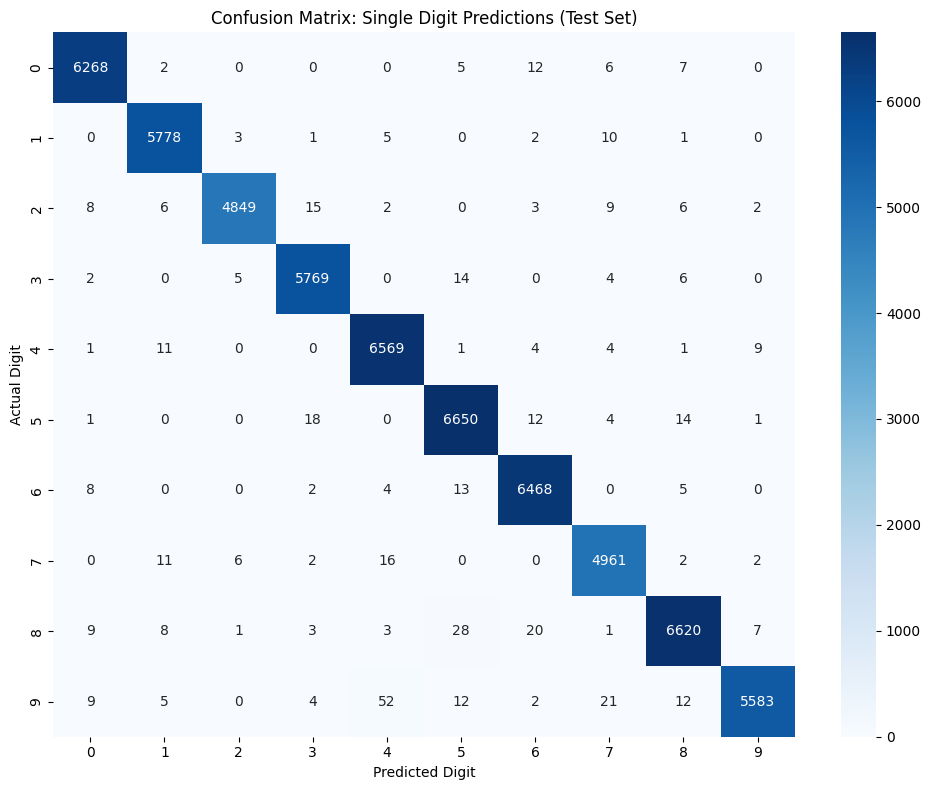


Per-digit accuracy:
Digit 0: 6268/6300 = 99.49%
Digit 1: 5778/5800 = 99.62%
Digit 2: 4849/4900 = 98.96%
Digit 3: 5769/5800 = 99.47%
Digit 4: 6569/6600 = 99.53%
Digit 5: 6650/6700 = 99.25%
Digit 6: 6468/6500 = 99.51%
Digit 7: 4961/5000 = 99.22%
Digit 8: 6620/6700 = 98.81%
Digit 9: 5583/5700 = 97.95%


In [41]:
# Confusion Matrix for single digit predictions
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Get single digit predictions on test set
print("Getting single digit predictions...")
d1_pred = digit_model.predict(X_test_digits_cnn[0:20000], verbose=0).argmax(axis=1)
d2_pred = digit_model.predict(X_test_digits_cnn[20000:40000], verbose=0).argmax(axis=1)
d3_pred = digit_model.predict(X_test_digits_cnn[40000:60000], verbose=0).argmax(axis=1)
# Combine all predictions and actual labels
all_digit_preds = np.concatenate([d1_pred, d2_pred, d3_pred])
all_digit_actual = y_test_digits
# Create confusion matrix
cm = confusion_matrix(all_digit_actual, all_digit_preds)
# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Digit')
plt.ylabel('Actual Digit')
plt.title('Confusion Matrix: Single Digit Predictions (Test Set)')
plt.tight_layout()
plt.show()
# Print accuracy per digit
print("\nPer-digit accuracy:")
for i in range(10):
    correct = cm[i, i]
    total = cm[i, :].sum()
    print(f"Digit {i}: {correct}/{total} = {correct/total*100:.2f}%")

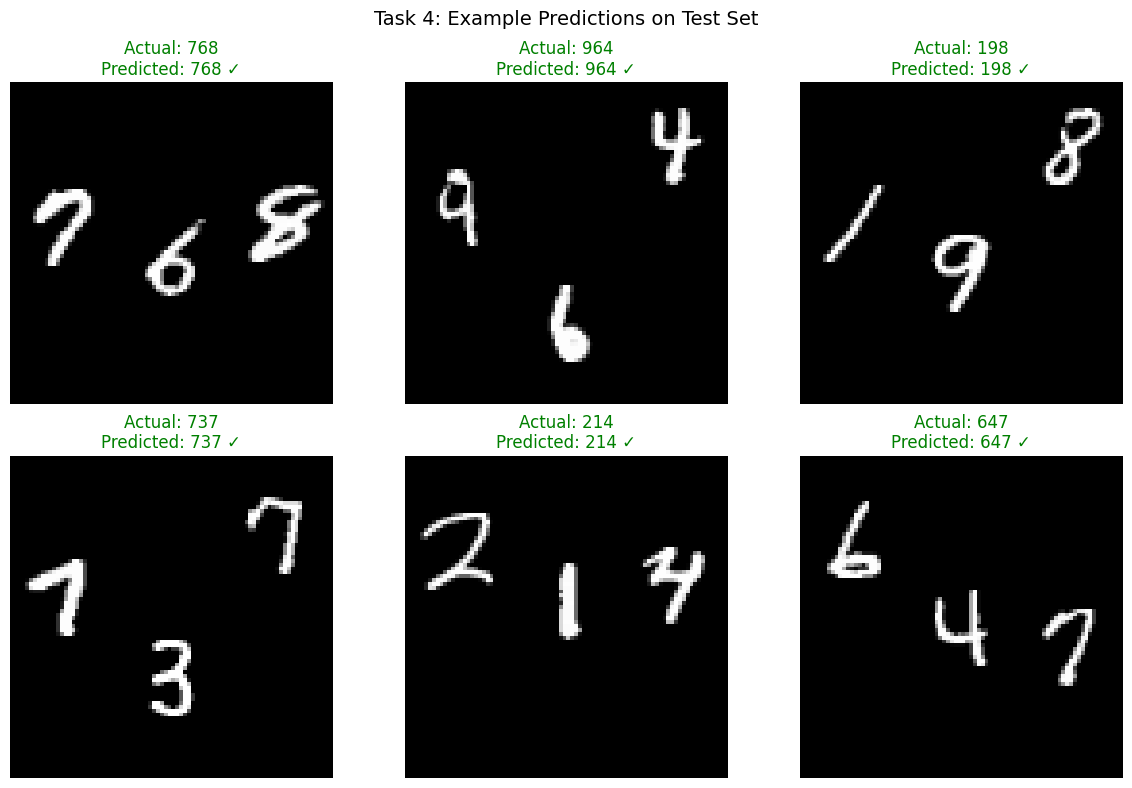


Overall: 19520/20000 correct (97.60%)


In [42]:
# Example Predictions: Show 6 test images with predictions
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Task 4: Example Predictions on Test Set', fontsize=14)
# Pick 6 random indices
np.random.seed(42)  # For reproducibility
indices = np.random.choice(len(X_test_2d), 6, replace=False)
for ax, idx in zip(axes.flatten(), indices):
    img = X_test_2d[idx]
    actual = y_test_2d[idx]
    predicted = predictions[idx]
    
    ax.imshow(img, cmap='gray')
    
    # Green title if correct, red if wrong
    if predicted == actual:
        ax.set_title(f'Actual: {actual}\nPredicted: {predicted} ✓', color='green')
    else:
        ax.set_title(f'Actual: {actual}\nPredicted: {predicted} ✗', color='red')
    ax.axis('off')
plt.tight_layout()
plt.show()
# Print summary
correct_count = sum(p == a for p, a in zip(predictions, y_test_2d))
print(f"\nOverall: {correct_count}/{len(predictions)} correct ({correct_count/len(predictions)*100:.2f}%)")

# TASK 5 


In [43]:
# Task 5a: Multi-label CNN (without splitting)
from tensorflow.keras import layers, models, Input
# Input layer
input_layer = Input(shape=(84, 84, 1))
# Shared convolutional layers
x = layers.Conv2D(32, (3, 3), activation='relu')(input_layer)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
# Shared dense layer
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
# Three separate output heads
output1 = layers.Dense(10, activation='softmax', name='digit1')(x)
output2 = layers.Dense(10, activation='softmax', name='digit2')(x)
output3 = layers.Dense(10, activation='softmax', name='digit3')(x)
# Build model with 3 outputs
multi_label_model = models.Model(
    inputs=input_layer,
    outputs=[output1, output2, output3]
)
multi_label_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics={'digit1': 'accuracy', 'digit2': 'accuracy', 'digit3': 'accuracy'}
)
multi_label_model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 84, 84, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 82, 82,    │        320 │ input_layer_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 41, 41,    │          0 │ conv2d_18[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 39, 39,    │     18,496 │ max_pooling2d_12… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_13    │ (None, 19, 19,    │          0 │ conv2d_19[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 17, 17,    │     36,928 │ max_pooling2d_13… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_6 (Flatten) │ (None, 18496)     │          0 │ conv2d_20[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 128)       │  2,367,616 │ flatten_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ digit1 (Dense)      │ (None, 10)        │      1,290 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ digit2 (Dense)      │ (None, 10)        │      1,290 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ digit3 (Dense)      │ (None, 10)        │      1,290 │ dense_12[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,427,230 (9.26 MB)

 Trainable params: 2,427,230 (9.26 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Extract individual digit labels from y_train_2d
y_train_d1 = np.array([int(label[0]) for label in y_train_2d])
y_train_d2 = np.array([int(label[1]) for label in y_train_2d])
y_train_d3 = np.array([int(label[2]) for label in y_train_2d])
# Train with 3 outputs
history_multi = multi_label_model.fit(
    X_train_cnn,
    [y_train_d1, y_train_d2, y_train_d3],
    epochs=5,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/5
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 73s 40ms/step - digit1_accuracy: 0.8867 - digit1_loss: 0.3372 - digit2_accuracy: 0.8903 - digit2_loss: 0.3253 - digit3_accuracy: 0.8804 - digit3_loss: 0.3519 - loss: 1.0144 - val_digit1_accuracy: 0.9561 - val_digit1_loss: 0.1431 - val_digit2_accuracy: 0.9431 - val_digit2_loss: 0.1758 - val_digit3_accuracy: 0.9658 - val_digit3_loss: 0.1161 - val_loss: 0.4350
Epoch 2/5
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 70s 39ms/step - digit1_accuracy: 0.9820 - digit1_loss: 0.0586 - digit2_accuracy: 0.9816 - digit2_loss: 0.0569 - digit3_accuracy: 0.9795 - digit3_loss: 0.0650 - loss: 0.1805 - val_digit1_accuracy: 0.9784 - val_digit1_loss: 0.0693 - val_digit2_accuracy: 0.9513 - val_digit2_loss: 0.1715 - val_digit3_accuracy: 0.9720 - val_digit3_loss: 0.0915 - val_loss: 0.3324
Epoch 3/5
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 72s 40ms/step - digit1_accuracy: 0.9882 - digit1_loss: 0.0345 - digit2_accuracy: 0.9896 - digit2_loss: 0.0305 - digit3_accuracy: 0.9889 - digit3_loss: 0.0354

In [45]:
# Evaluate multi-label CNN on validation set
y_val_d1 = np.array([int(label[0]) for label in y_val_2d])
y_val_d2 = np.array([int(label[1]) for label in y_val_2d])
y_val_d3 = np.array([int(label[2]) for label in y_val_2d])
# Predict
print("Predicting on validation set...")
preds_val = multi_label_model.predict(X_val_cnn, verbose=1)
d1_val = preds_val[0].argmax(axis=1)
d2_val = preds_val[1].argmax(axis=1)
d3_val = preds_val[2].argmax(axis=1)
# Combine into 3-digit predictions
predictions_val_multi = [f"{d1}{d2}{d3}" for d1, d2, d3 in zip(d1_val, d2_val, d3_val)]
# Calculate accuracy
correct_val = sum(p == a for p, a in zip(predictions_val_multi, y_val_2d))
val_accuracy_multi = correct_val / len(y_val_2d)
print(f"Task 5a Validation Accuracy: {val_accuracy_multi * 100:.2f}%")

Predicting on validation set...
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step
Task 5a Validation Accuracy: 90.95%


In [46]:
# Evaluate multi-label CNN on test set
y_test_d1 = np.array([int(label[0]) for label in y_test_2d])
y_test_d2 = np.array([int(label[1]) for label in y_test_2d])
y_test_d3 = np.array([int(label[2]) for label in y_test_2d])
# Predict
print("Predicting on test set...")
preds_test = multi_label_model.predict(X_test_cnn, verbose=1)
d1_test = preds_test[0].argmax(axis=1)
d2_test = preds_test[1].argmax(axis=1)
d3_test = preds_test[2].argmax(axis=1)
# Combine into 3-digit predictions
predictions_test_multi = [f"{d1}{d2}{d3}" for d1, d2, d3 in zip(d1_test, d2_test, d3_test)]
# Calculate accuracy and F1
from sklearn.metrics import f1_score
correct_test = sum(p == a for p, a in zip(predictions_test_multi, y_test_2d))
test_accuracy_multi = correct_test / len(y_test_2d)
test_f1_multi = f1_score(y_test_2d, predictions_test_multi, average='weighted', zero_division=0)
print(f"Task 5a Test Accuracy: {test_accuracy_multi * 100:.2f}%")
print(f"Task 5a Test F1 Score: {test_f1_multi:.4f}")

Predicting on test set...
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step
Task 5a Test Accuracy: 90.50%
Task 5a Test F1 Score: 0.9412


# TASK 5b

In [47]:
# Task 5b: GAN - Build Generator
from tensorflow.keras import layers, models
def build_generator(latent_dim):
    model = models.Sequential([
        # Start from random noise, project to small feature map
        layers.Dense(7 * 7 * 256, input_dim=latent_dim),
        layers.Reshape((7, 7, 256)),
        
        # Upsample to 14x14
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        
        # Upsample to 28x28
        layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        
        # Upsample to 56x56
        layers.Conv2DTranspose(32, (4, 4), strides=(2, 2), padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        
        # Upsample to 112x112, then crop to 84x84
        layers.Conv2DTranspose(1, (4, 4), strides=(2, 2), padding='same', activation='tanh'),
        layers.Cropping2D(cropping=((14, 14), (14, 14)))  # 112 - 28 = 84
    ])
    return model
latent_dim = 100
generator = build_generator(latent_dim)
generator.summary()

/Users/alexmusyoka/Projects/Machine Learning Course work /.venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 12544)          │     1,266,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 128)    │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 64)     │       131,136 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 56, 56, 32)     │        32,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 112, 112, 1)    │           513 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cropping2d (Cropping2D)         │ (None, 84, 84, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,956,705 (7.46 MB)

 Trainable params: 1,956,257 (7.46 MB)

 Non-trainable params: 448 (1.75 KB)

In [48]:
# Task 5b: GAN - Build Discriminator
from tensorflow.keras.optimizers import Adam
def build_discriminator():
    model = models.Sequential([
        layers.Conv2D(32, (4, 4), strides=(2, 2), padding='same', input_shape=(84, 84, 1)),
        layers.LeakyReLU(0.2),
        
        layers.Conv2D(64, (4, 4), strides=(2, 2), padding='same'),
        layers.BatchNormalization(),
        layers.LeakyReLU(0.2),
        
        layers.Conv2D(128, (4, 4), strides=(2, 2), padding='same'),
        layers.BatchNormalization(),
        layers.LeakyReLU(0.2),
        
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])
    return model
discriminator = build_discriminator()
disc_optimizer = Adam(learning_rate=0.0002, beta_1=0.5)  
discriminator.compile(optimizer=disc_optimizer, loss='binary_crossentropy', metrics=['accuracy'])
discriminator.summary()

/Users/alexmusyoka/Projects/Machine Learning Course work /.venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 42, 42, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 42, 42, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 21, 21, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 11, 11, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 11, 11, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │        15,489 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 180,833 (706.38 KB)

 Trainable params: 180,449 (704.88 KB)

 Non-trainable params: 384 (1.50 KB)

In [49]:
# Task 5b: Combine Generator + Discriminator into GAN
from tensorflow.keras.optimizers import Adam
gen_optimizer = Adam(learning_rate=0.0002, beta_1=0.5)  # NEW
discriminator.trainable = False
gan_input = layers.Input(shape=(latent_dim,))
fake_image = generator(gan_input)
gan_output = discriminator(fake_image)
gan = models.Model(gan_input, gan_output)
gan.compile(optimizer=gen_optimizer, loss='binary_crossentropy')  # NEW optimizer
print("GAN rebuilt with DCGAN optimizers")

GAN rebuilt with DCGAN optimizers


In [50]:
print(X_train_cnn.min(), X_train_cnn.max(), X_train_cnn.mean(), X_train_cnn.dtype, X_train_cnn.shape)


0.0 1.0 0.04394931528166822 float64 (64000, 84, 84, 1)


In [51]:
# Task 5b: Train GAN
import numpy as np
# Training parameters
epochs = 1000 # <-- Changed from 50
batch_size = 128
sample_interval = 100  # <-- Print every 50 epochs
# Normalize images to [-1, 1] for tanh activation
X_train_gan = (X_train_cnn.astype('float32') - 0.5) * 2
# Labels
real_labels = np.ones((batch_size, 1))
fake_labels = np.zeros((batch_size, 1))
# Training loop
print("Training GAN...")
for epoch in range(epochs):
    
    # Train Discriminator
    idx = np.random.randint(0, X_train_gan.shape[0], batch_size)
    real_images = X_train_gan[idx]
    
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_images = generator.predict(noise, verbose=0)
    
    d_loss_real = discriminator.train_on_batch(real_images, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
    # Train Generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan.train_on_batch(noise, real_labels)
    
    # Print progress
    if epoch % sample_interval == 0:
        print(f"Epoch {epoch}/{epochs} - D Loss: {d_loss[0]:.4f}, D Acc: {d_loss[1]*100:.1f}%, G Loss: {g_loss:.4f}")
print("GAN training complete!")

Training GAN...


/Users/alexmusyoka/Projects/Machine Learning Course work /.venv/lib/python3.13/site-packages/keras/src/backend/tensorflow/trainer.py:86: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0/1000 - D Loss: 0.6283, D Acc: 77.3%, G Loss: 0.6731
Epoch 100/1000 - D Loss: 0.6545, D Acc: 50.2%, G Loss: 0.2863
Epoch 200/1000 - D Loss: 0.6539, D Acc: 50.1%, G Loss: 0.1734
Epoch 300/1000 - D Loss: 0.6590, D Acc: 50.1%, G Loss: 0.1258
Epoch 400/1000 - D Loss: 0.7262, D Acc: 50.0%, G Loss: 0.0997
Epoch 500/1000 - D Loss: 0.9181, D Acc: 50.0%, G Loss: 0.0831
Epoch 600/1000 - D Loss: 1.1384, D Acc: 50.0%, G Loss: 0.0717
Epoch 700/1000 - D Loss: 1.3236, D Acc: 50.0%, G Loss: 0.0634
Epoch 800/1000 - D Loss: 1.4713, D Acc: 50.0%, G Loss: 0.0570
Epoch 900/1000 - D Loss: 1.5903, D Acc: 50.0%, G Loss: 0.0520
GAN training complete!


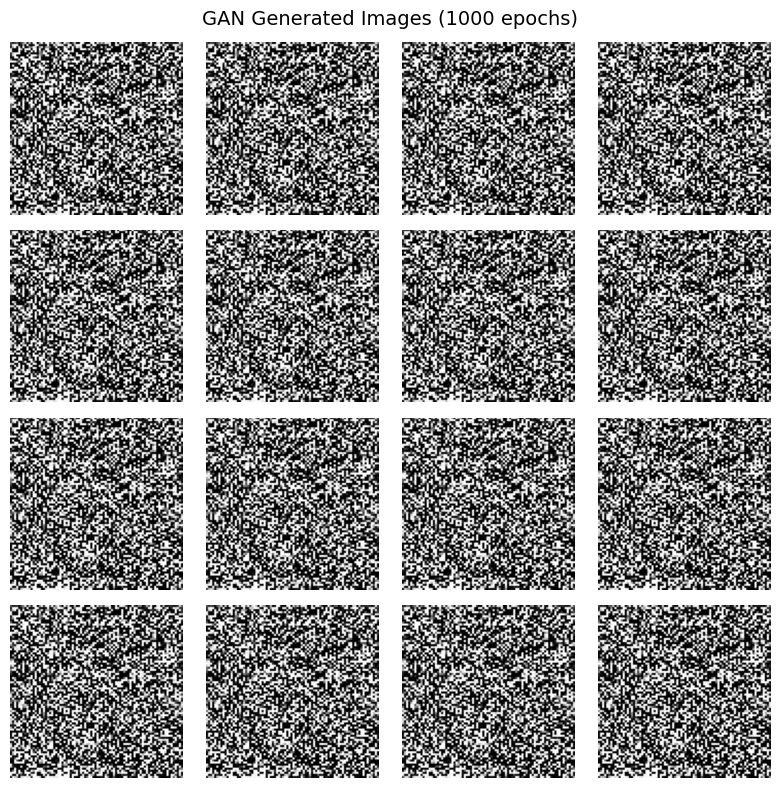

In [52]:
# Visualise generated images
import matplotlib.pyplot as plt
# Generate 16 fake images
noise = np.random.normal(0, 1, (16, latent_dim))
generated_images = generator.predict(noise, verbose=0)
# Rescale from [-1, 1] to [0, 1] for display
generated_images = (generated_images + 1) / 2
# Plot
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
fig.suptitle('GAN Generated Images (1000 epochs)', fontsize=14)
for i, ax in enumerate(axes.flatten()):
    ax.imshow(generated_images[i, :, :, 0], cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()